<a href="https://colab.research.google.com/github/smwares/Credit-Card-Fraud-Detection/blob/main/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library required for uploading to and downloading from Colab
!pip install opendatasets
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [ ]:
# Import the necessary module requred to upload the json file containing the user's Kaggle username and API key
from google.colab import files
files.upload()

In [4]:
# Make the directory necessar to place the Kaggle json credentials file. RUN THIS ONLY ONCE PER SESSION
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the CC data set from Kaggle
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

Skipping, found downloaded files in "./fraud-detection" (use force=True to force download)


In [6]:
# Import data as DataFrames
fraud_test = pd.read_csv('./fraud-detection/fraudTest.csv', index_col=0)
fraud_train = pd.read_csv('./fraud-detection/fraudTrain.csv', index_col=0)

In [7]:
# Combine the DF's into a single DF
fraud_df = pd.concat([fraud_train, fraud_test])

In [8]:
# Get some descriptive stats on the dataframe
print(fraud_df.head())
print(fraud_df.describe())
print(fraud_df.info())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393 

In [9]:
# Check for nulls
fraud_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# Check for duplicates
fraud_df.duplicated().sum()

0

In [11]:
# Check how much of the data is legitimate, and how much of it is fraudulent
print('Total # of transactions:', len(fraud_df))
print('Valid # of transactions:', len(fraud_df[fraud_df['is_fraud'] == 0]),
      '(' + str((len(fraud_df[fraud_df['is_fraud'] == 0])) * 100/ len(fraud_df)) + '%)')
print('Fraudulent # of transactions:', len(fraud_df[fraud_df['is_fraud'] == 1]),
      '(' + str((len(fraud_df[fraud_df['is_fraud'] == 1])) * 100/ len(fraud_df)) + '%)')

Total # of transactions: 1852394
Valid # of transactions: 1842743 (99.47899852839083%)
Fraudulent # of transactions: 9651 (0.5210014716091717%)


In [12]:
# Convert columns to date/datetime format where possible
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])

In [13]:
# Add a new column with times converted from the Unix time column into datetime format
fraud_df['from_unix_time'] = pd.to_datetime(fraud_df['unix_time'], unit='s')

In [14]:
# Create a column with first and last names
fraud_df['full_name'] = fraud_df['first'] + ' ' + fraud_df['last']

In [15]:
# Drop the transaction number column as it has no analytical use
fraud_df.drop('trans_num', axis=1, inplace=True)

In [16]:
# Check column names and types
fraud_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
from_unix_time           datetime64[ns]
full_name                        object
dtype: object

In [17]:
# Drop the 'fraud_' from the merchants' names
fraud_df['merchant'] = fraud_df['merchant'].str.lstrip('fraud_')

In [18]:
# Make a list of columns to rearrange the DF
rearranged_cols = list(fraud_df.columns)[0:7] + ['full_name'] + list(fraud_df.columns) [7:18] + ['from_unix_time'] + list(fraud_df.columns)[18:21]

In [19]:
# Rearrange the columns
fraud_df = fraud_df[rearranged_cols]

In [ ]:
# Save the formatted/cleaned DF as a CSV
fraud_df.to_csv('fraud_cleaned.csv')

In [ ]:
# Save the new CSV locally
files.download('fraud_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Add a column for transaction time in epoch format
fraud_df['trans_date_trans_time_unix_time'] = fraud_df['trans_date_trans_time'].astype('int64')//1e9

In [33]:
# Create columns with hour from date, day from date, weekday from date, and month from date
fraud_df['trans_hour'] = fraud_df['trans_date_trans_time'].dt.hour
fraud_df['trans_day'] = fraud_df['trans_date_trans_time'].dt.day
fraud_df['trans_weekday'] = fraud_df['trans_date_trans_time'].dt.weekday
fraud_df['trans_month'] = fraud_df['trans_date_trans_time'].dt.month

In [34]:
# Check column names and types
fraud_df.dtypes

trans_date_trans_time              datetime64[ns]
cc_num                                      int64
merchant                                   object
category                                   object
amt                                       float64
first                                      object
last                                       object
full_name                                  object
gender                                     object
street                                     object
city                                       object
state                                      object
zip                                         int64
lat                                       float64
long                                      float64
city_pop                                    int64
job                                        object
dob                                datetime64[ns]
unix_time                                   int64
from_unix_time                     datetime64[ns]


In [40]:
# Rearrange the columns again
fraud_df = fraud_df[list(fraud_df.columns)[0:1] + list(fraud_df.columns)[23:] + list(fraud_df.columns)[1:23]]

In [41]:
fraud_df.describe()

,trans_date_trans_time_unix_time,trans_hour,trans_day,trans_weekday,trans_month,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,1.579556e+09,1.280612e+01,1.585076e+01,2.967456e+00,7.152067e+00,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.822443e+07,6.815753e+00,8.876245e+00,2.197983e+00,3.424954e+00,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,1.546301e+09,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.563855e+09,7.000000e+00,8.000000e+00,1.000000e+00,4.000000e+00,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,1.577928e+09,1.400000e+01,1.600000e+01,3.000000e+00,7.000000e+00,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,1.595506e+09,1.900000e+01,2.400000e+01,5.000000e+00,1.000000e+01,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.609459e+09,2.300000e+01,3.100000e+01,6.000000e+00,1.200000e+01,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [42]:
# Check how many unique values are there for each column
fraud_df.nunique()

trans_date_trans_time              1819551
trans_date_trans_time_unix_time    1819551
trans_hour                              24
trans_day                               31
trans_weekday                            7
trans_month                             12
cc_num                                 999
merchant                               693
category                                14
amt                                  60616
first                                  355
last                                   486
full_name                              989
gender                                   2
street                                 999
city                                   906
state                                   51
zip                                    985
lat                                    983
long                                   983
city_pop                               891
job                                    497
dob                                    984
unix_time  

In [43]:
# Check how much of the dataset is fraud and how much of it is valid
print("Percent of transactions that are fraudulent: " + str(len(fraud_df[fraud_df['is_fraud'] == 1]) * 100.0 / (len(fraud_df))) + "%")

Percent of transactions that are fraudulent: 0.5210014716091717%


trans_date_trans_time_unix_time


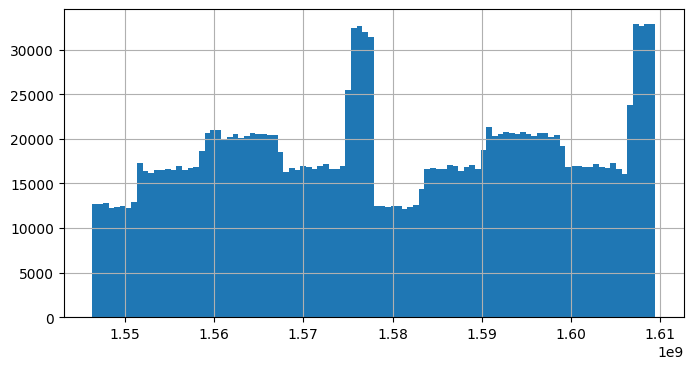

trans_hour


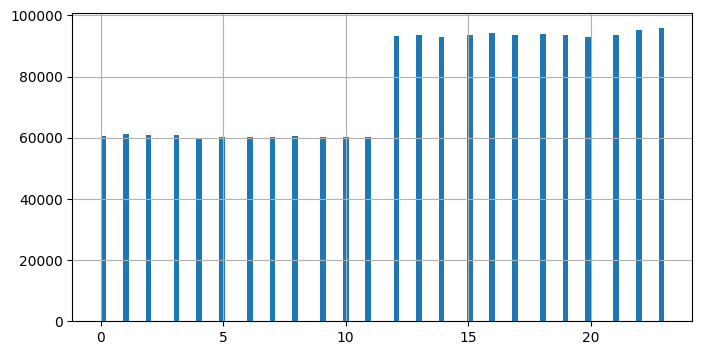

trans_day


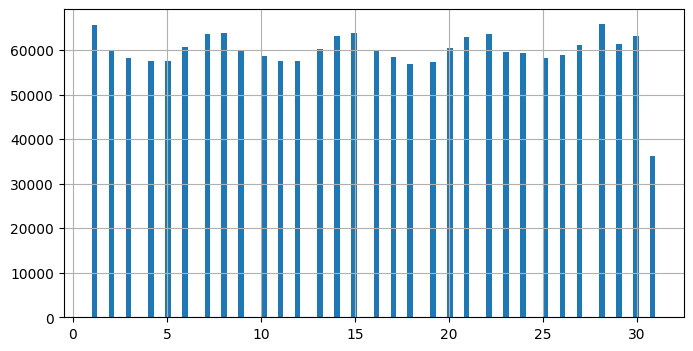

trans_weekday


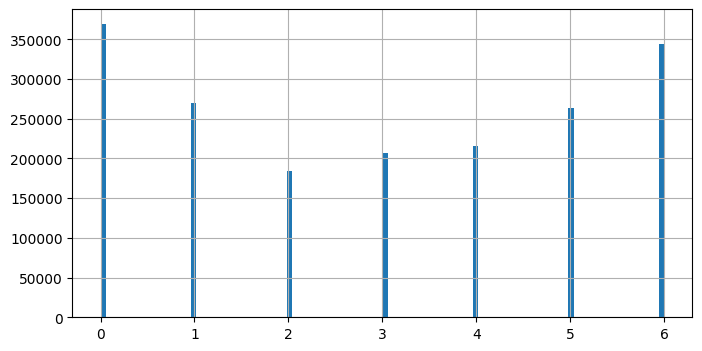

trans_month


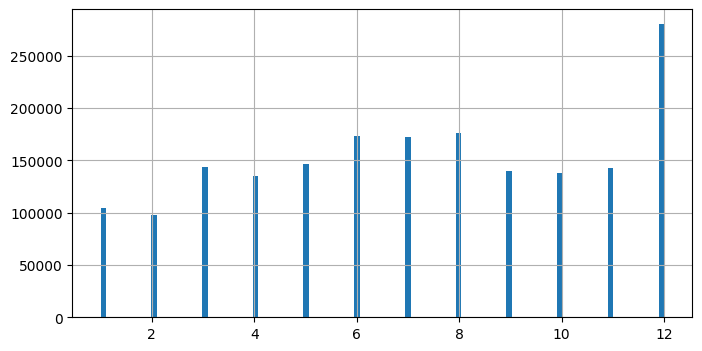

cc_num


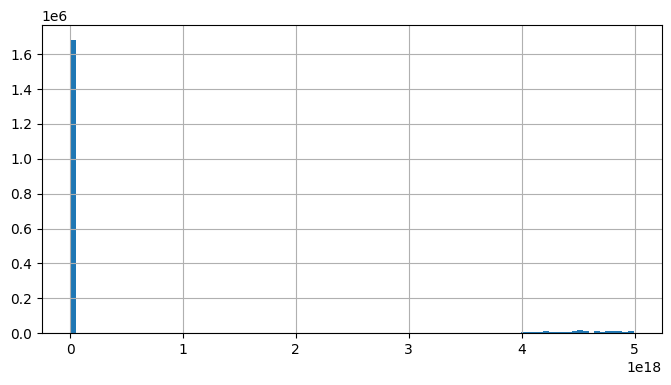

amt


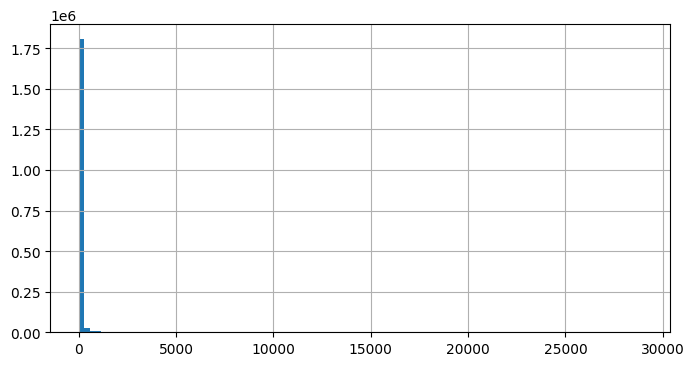

zip


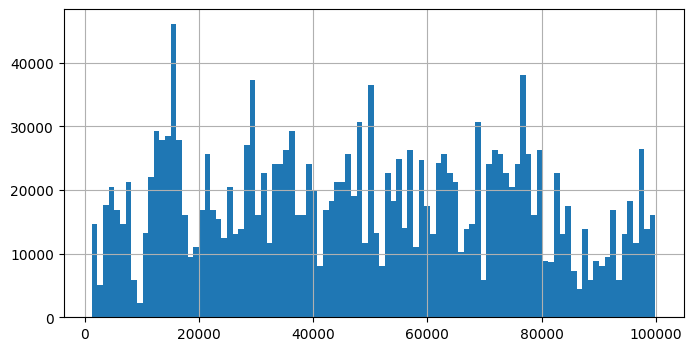

lat


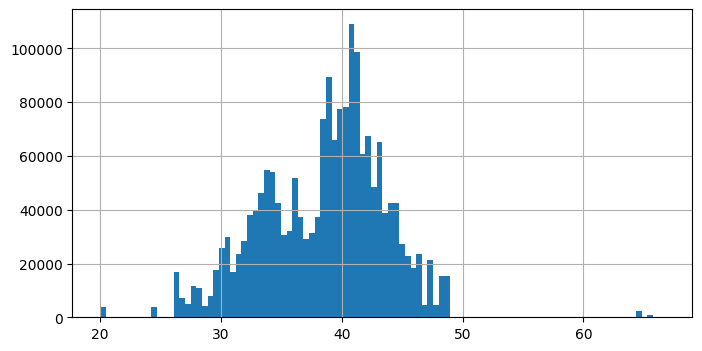

long


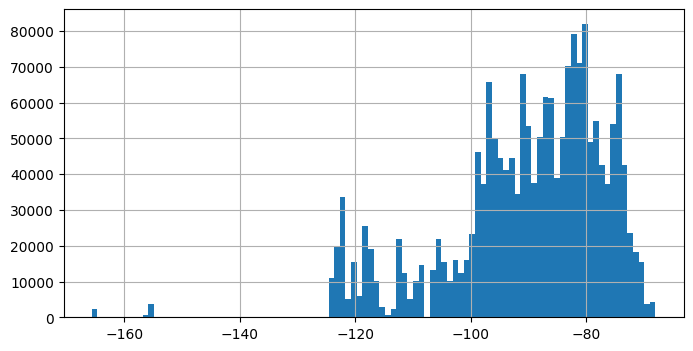

city_pop


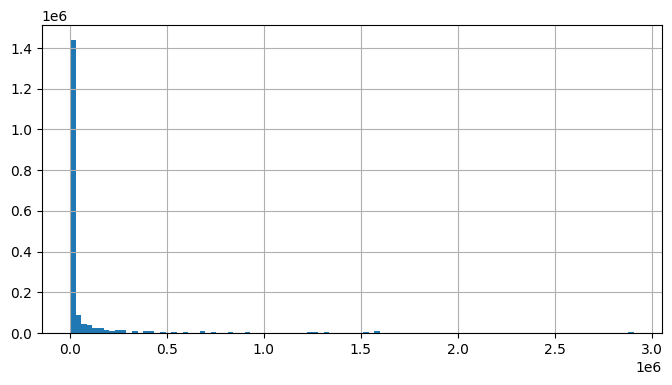

unix_time


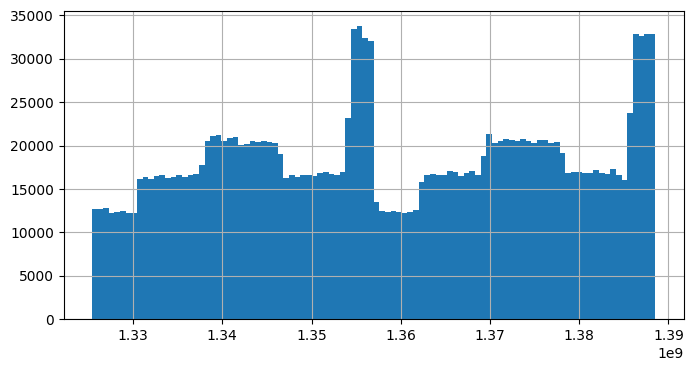

merch_lat


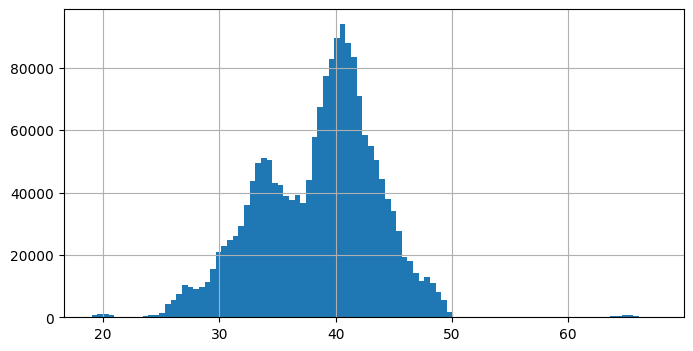

merch_long


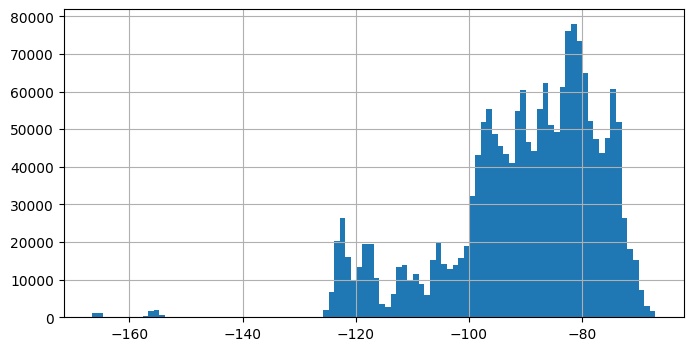

In [44]:
# Print out a histogram for each column
# Set a bin size, can be changed as necessary
bin_size = 100
cols_to_print = ['trans_date_trans_time_unix_time', 'trans_hour', 'trans_day', 'trans_weekday', 'trans_month',
                 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

for column in cols_to_print:
  print(column)
  fraud_df[column].hist(bins=bin_size, figsize=(8,4))
  plt.show()

In [45]:
# Create two subsets from the dataframe, one that only has rows that had no frauds, one that only had frauds
valid = fraud_df[fraud_df['is_fraud'] == 0][fraud_df.columns[:-1]]
fraud = fraud_df[fraud_df['is_fraud'] == 1][fraud_df.columns[:-1]]

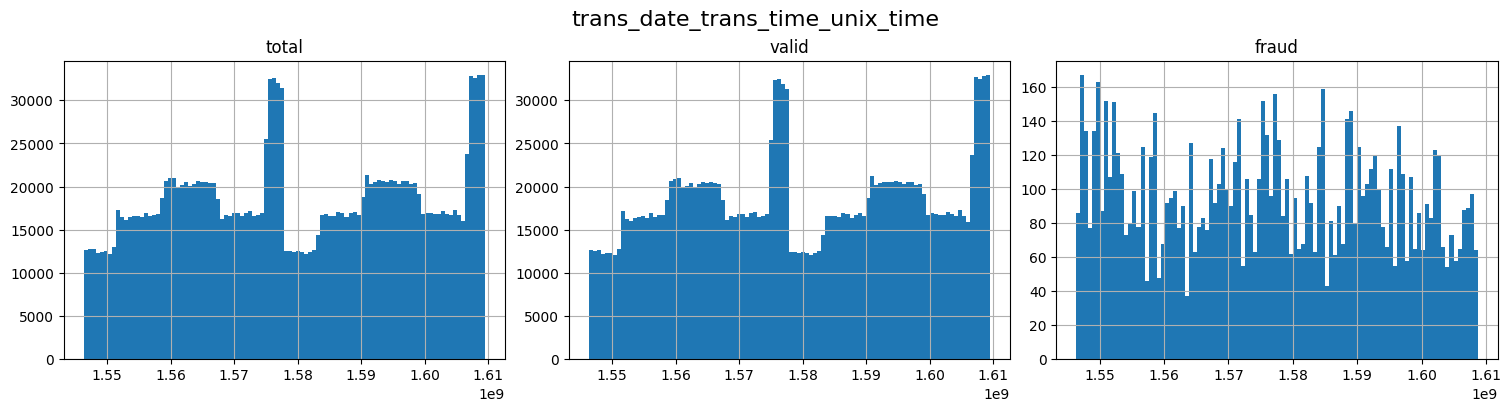

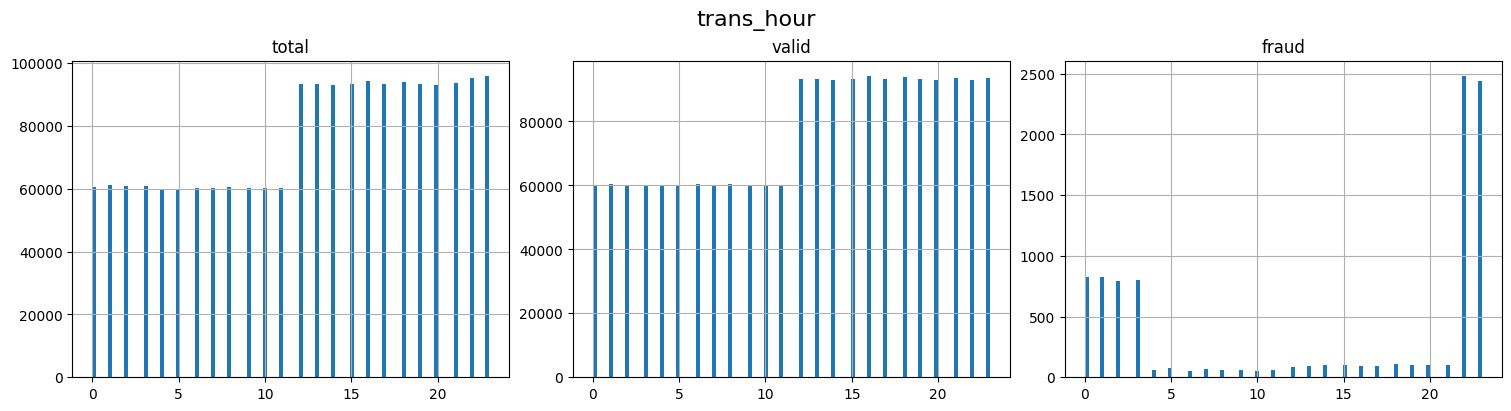

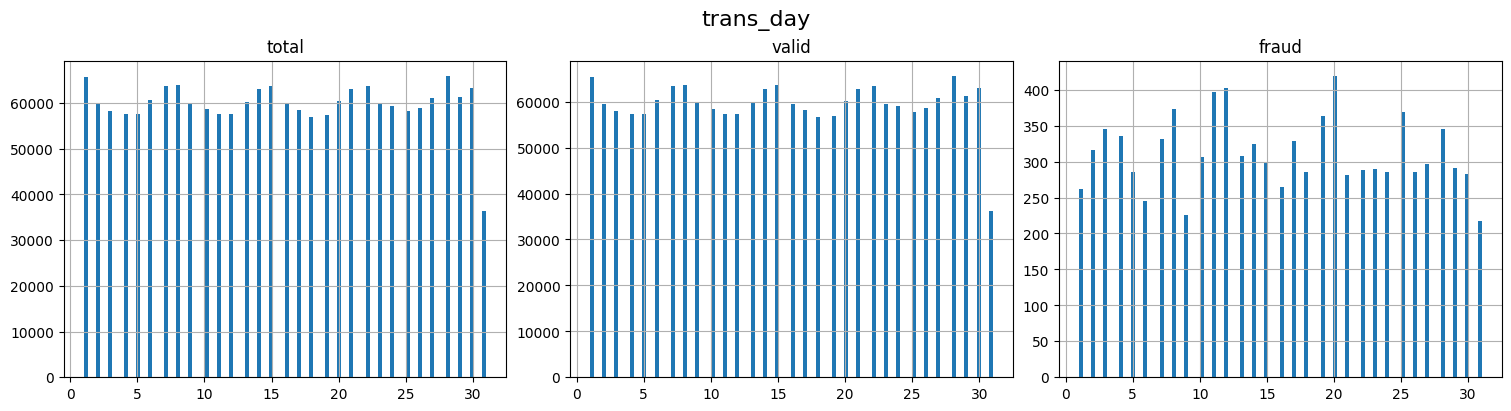

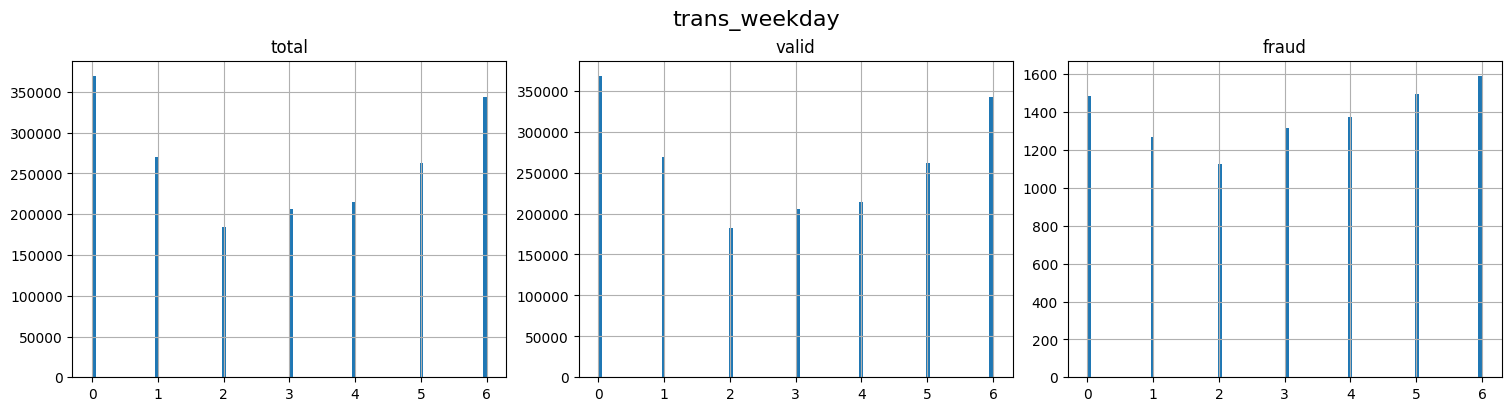

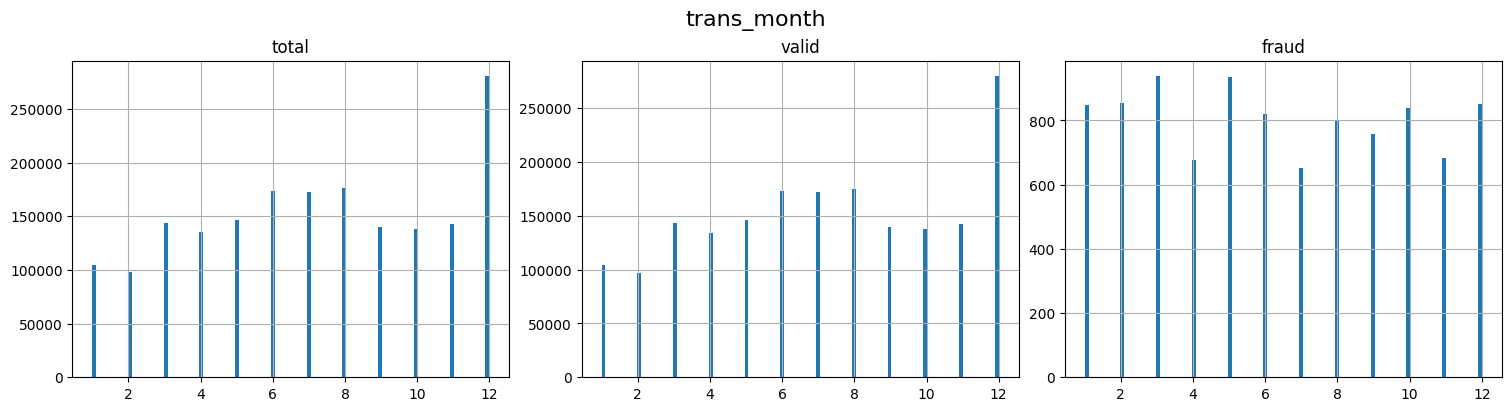

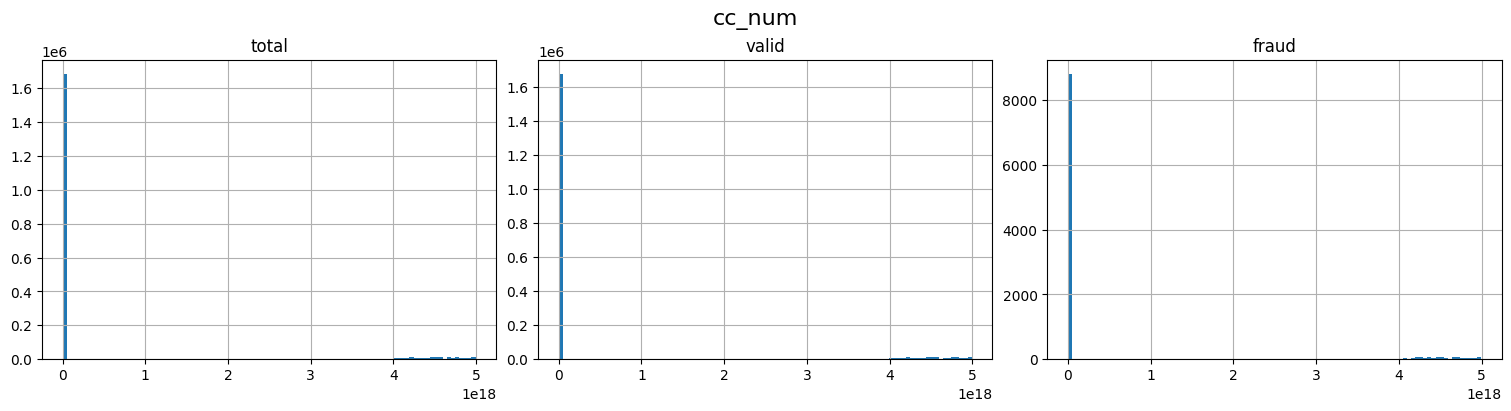

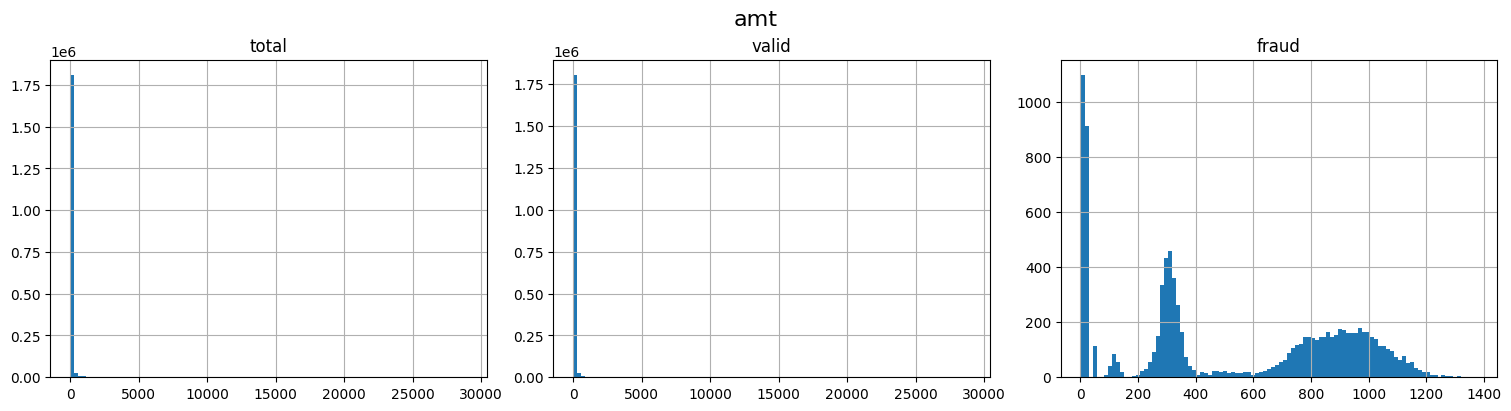

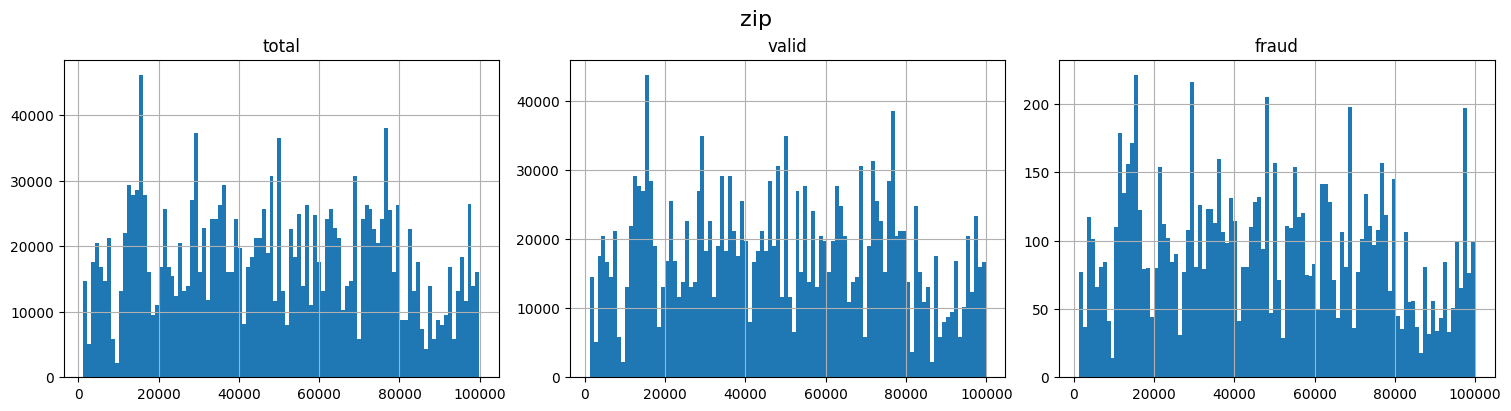

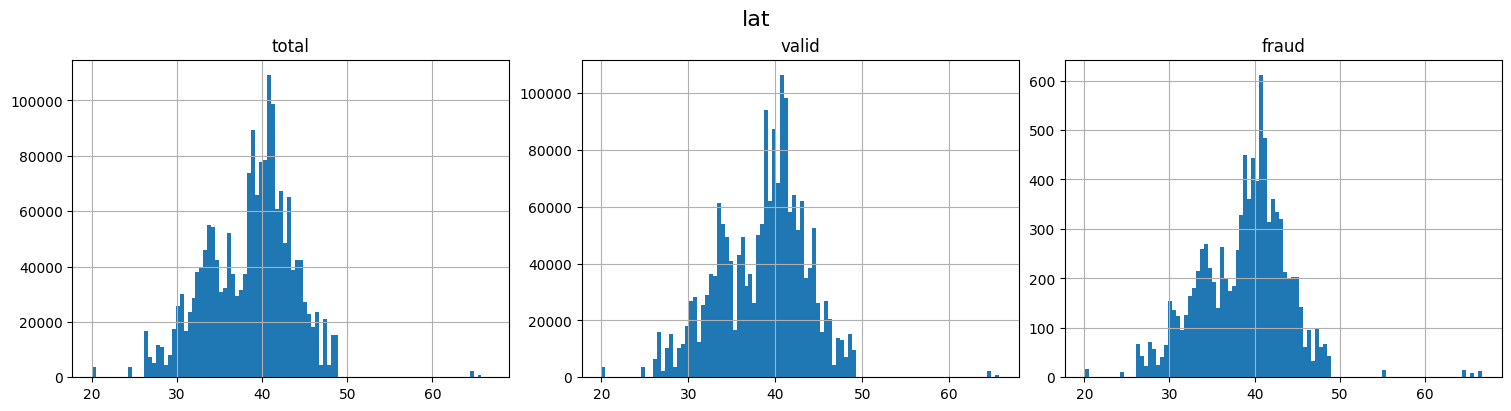

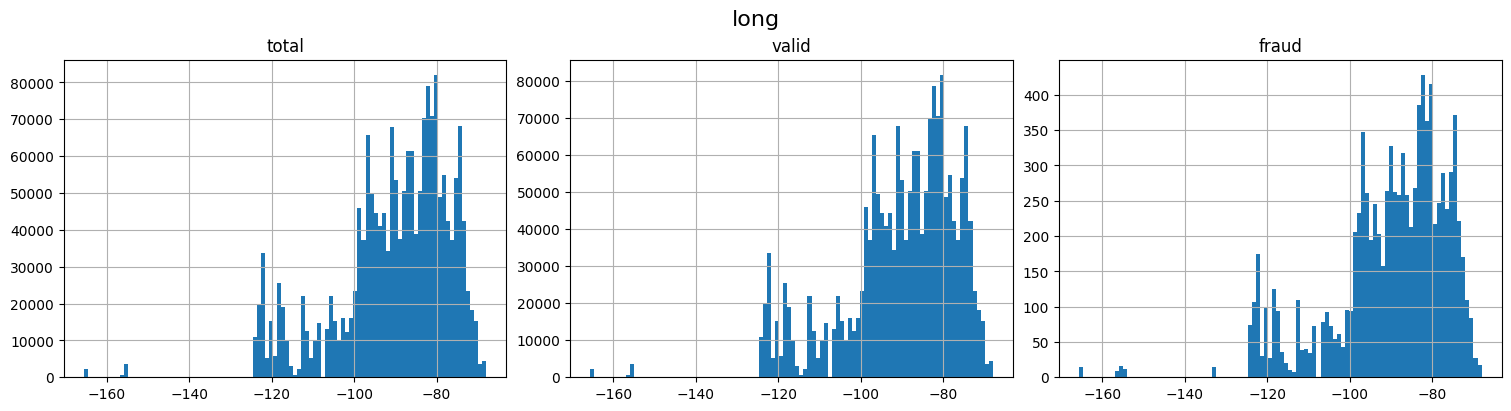

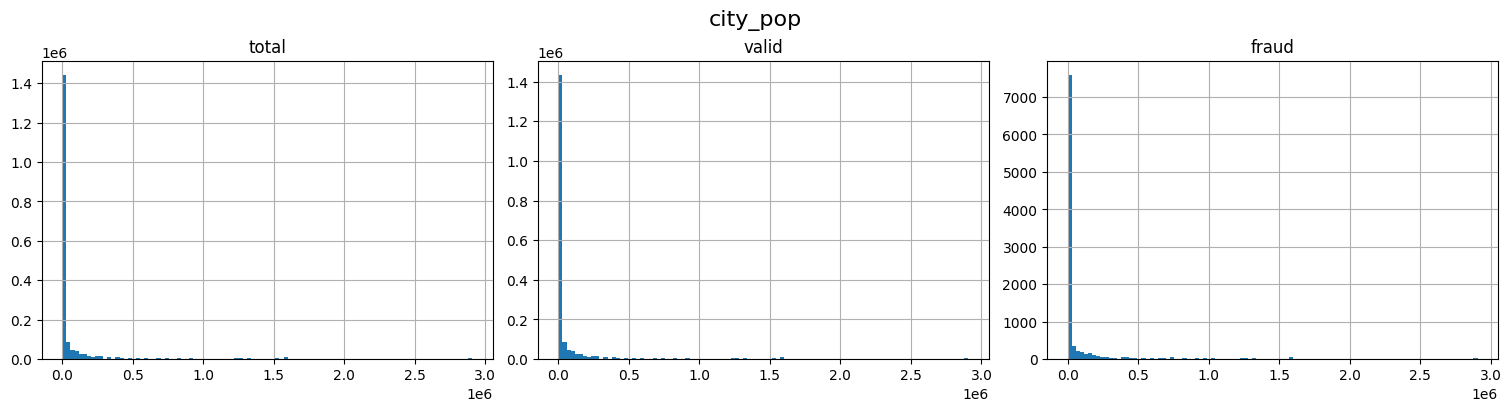

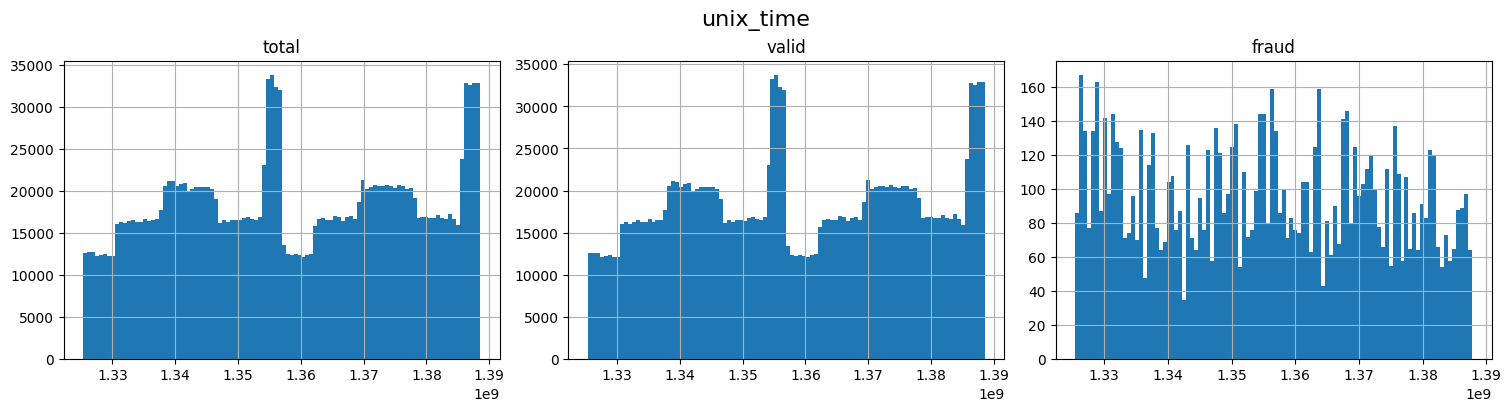

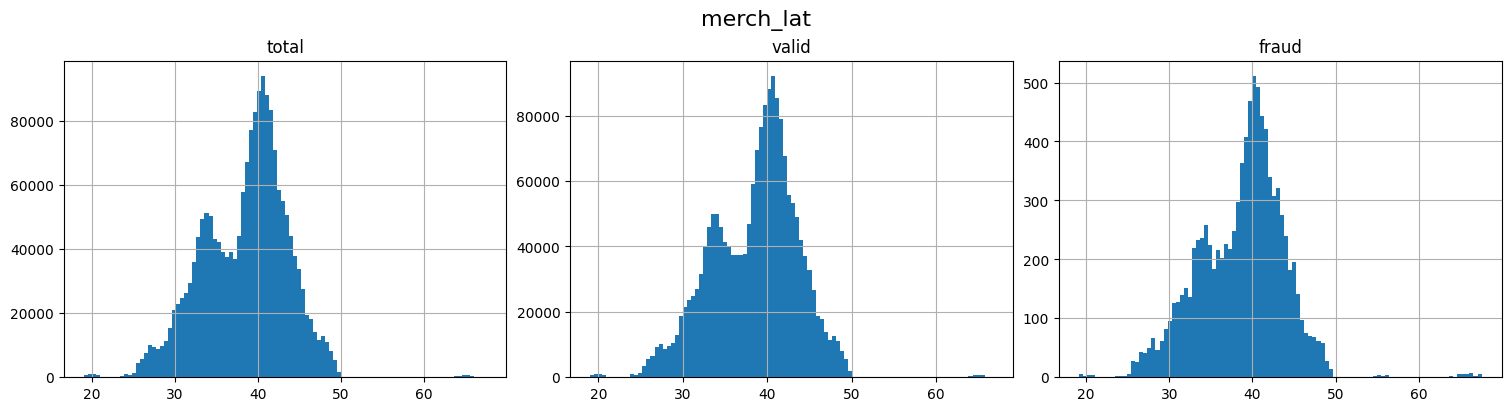

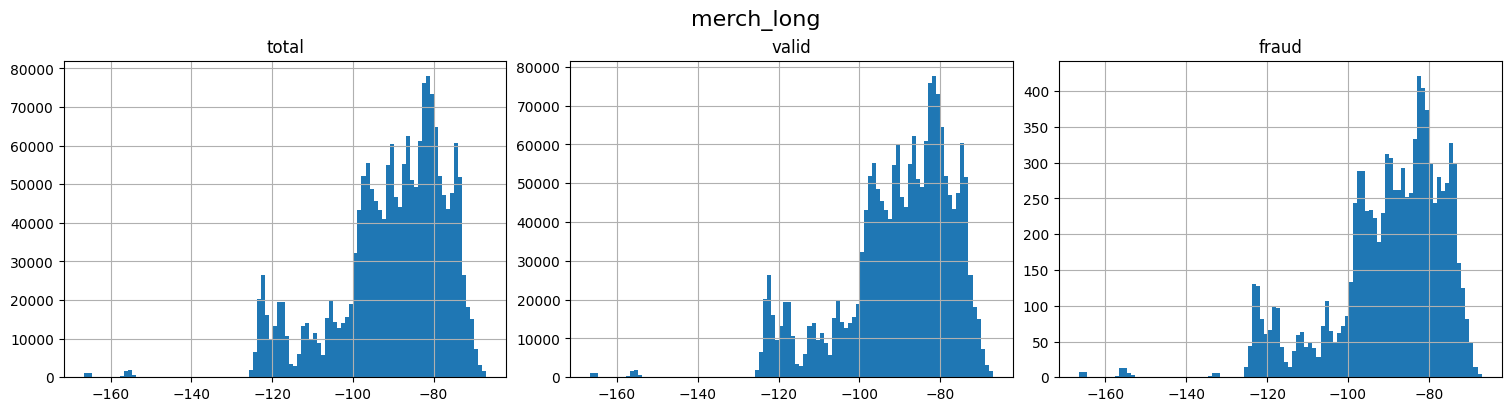

In [46]:
# Print out histograms side-by-side to compare distributions
for column in cols_to_print:
  fig, axes = plt.subplots(1, 3, figsize=(15,4), layout='constrained')
  fig.suptitle(column, fontsize=16)
  axes[0].set_title('total')
  axes[1].set_title('valid')
  axes[2].set_title('fraud')
  fraud_df[column].hist(bins=bin_size, ax=axes[0])
  valid[column].hist(bins=bin_size, ax=axes[1])
  fraud[column].hist(bins=bin_size, ax=axes[2])
  plt.show()

In [47]:
# Create a correlation matrix, using Kendall-Tau method since data doesn't follow normal distribution
fraud_corr = fraud_df.corr(method='kendall', numeric_only=True)
fraud_corr

,trans_date_trans_time_unix_time,trans_hour,trans_day,trans_weekday,trans_month,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time_unix_time,1.000000,0.000971,0.048098,-0.047049,0.477147,0.000811,-0.000700,0.000743,0.000590,-0.000766,-0.001937,0.999999,0.000594,-0.000764,-0.010846
trans_hour,0.000971,1.000000,-0.000193,0.000508,-0.000728,0.007597,-0.105603,0.004262,-0.007177,-0.003664,0.021973,0.000970,-0.006965,-0.003666,0.017819
trans_day,0.048098,-0.000193,1.000000,-0.002179,0.007220,-0.000378,-0.000226,-0.000318,-0.000583,0.000189,0.000090,0.048098,-0.000628,0.000194,-0.000124
trans_weekday,-0.047049,0.000508,-0.002179,1.000000,-0.003901,-0.000168,0.000704,-0.000676,0.000526,0.000628,0.000305,-0.047049,0.000433,0.000600,0.003881
trans_month,0.477147,-0.000728,0.007220,-0.003901,1.000000,0.000571,-0.001851,0.000856,-0.000142,-0.000890,-0.000060,0.477147,-0.000125,-0.000889,-0.013820
cc_num,0.000811,0.007597,-0.000378,-0.000168,0.000571,1.000000,-0.000577,0.009304,-0.001349,-0.009059,0.032856,0.000811,-0.001821,-0.008898,-0.001175
amt,-0.000700,-0.105603,-0.000226,0.000704,-0.001851,-0.000577,1.000000,0.000833,0.008652,-0.000237,-0.015874,-0.000700,0.008596,-0.000154,0.068072
zip,0.000743,0.004262,-0.000318,-0.000676,0.000856,0.009304,0.000833,1.000000,-0.127623,-0.829748,-0.026995,0.000743,-0.125903,-0.825227,-0.001968
lat,0.000590,-0.007177,-0.000583,0.000526,-0.000142,-0.001349,0.008652,-0.127623,1.000000,0.085186,-0.176595,0.000590,0.919641,0.083767,0.001803
long,-0.000766,-0.003664,0.000189,0.000628,-0.000890,-0.009059,-0.000237,-0.829748,0.085186,1.000000,0.060360,-0.000766,0.084231,0.965916,0.001877


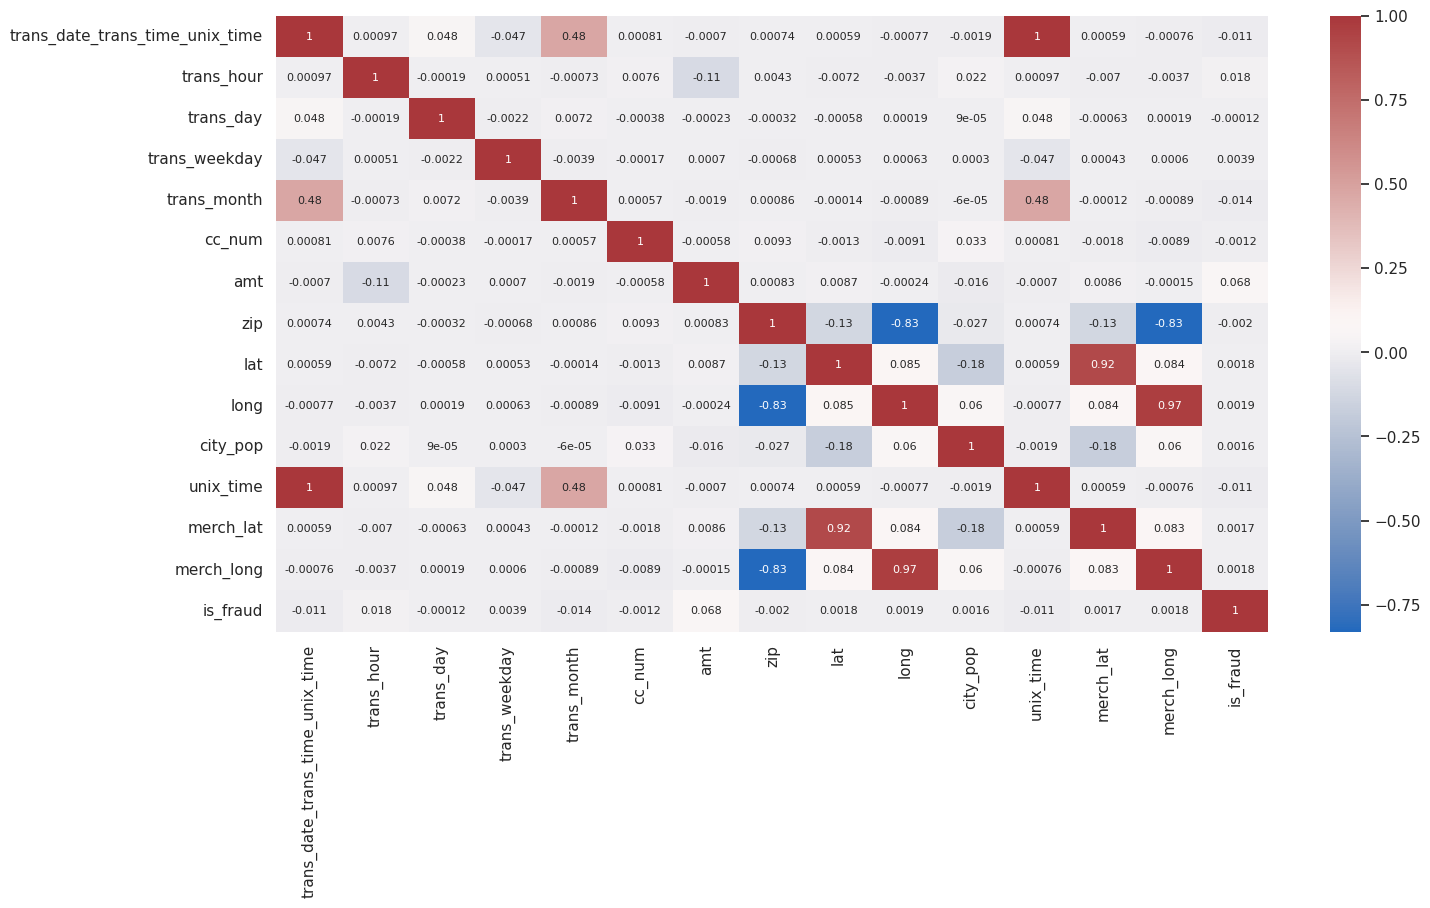

In [48]:
# Display a heatmap of the correlation matrix
sns.set(rc={"figure.figsize":(16, 8)})
sns.heatmap(fraud_corr, annot=True, annot_kws={'size': 8}, cmap='vlag')
plt.show()